In [1]:
import math
import numpy as np
import tomlkit
import pandas as pd
import yaml
from IPython.display import display
import importlib
import copy
import awkward as ak

import study_lib

In [2]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [3]:
importlib.reload(study_lib)
do_run = study_lib.do_run 
run_experiment = study_lib.run_experiment
config_series = study_lib.config_series

In [20]:
base_config_yaml = f"""
candidates: 4
voters: 2000
considerations:
- Issues:
    - halfcsep: 0.
      halfvsep: 0.
      sigma: {1./math.sqrt(3.)}
      uniform: true
methods:
- Plurality:
    strat: Honest
- Plurality:
    strat: Strategic
- InstantRunoff: {{}}
- Range:
    nranks: 2
    strat: Honest
- Range:
    nranks: 2
    strat: Strategic
- STAR:
    strat: Honest
- STAR:
    strat: Strategic
    strategic_stretch_factor: 2.0
- BtrIrv:
    strat: Honest
- RP:
    strat: Honest
"""
base_config = yaml.safe_load(base_config_yaml)

In [5]:
config = copy.deepcopy(base_config)
(df := run_experiment(config_series(config, 'candidates', [2, 3, 4, 5]), trials=20000, with_results=True))

,candidates,pl_h_mR,pl_s_mR,IRV_h_mR,aprv_h_mR,aprv_s_mR,star_6_h_mR,star_6_s_mR,BTR-IRV_h_mR,rp_h_mR
0,2,0.160700,0.160700,0.160100,0.159700,0.159800,0.160500,0.160100,0.160100,0.160400
1,3,0.303545,0.099772,0.100056,0.056530,0.065108,0.061499,0.070651,0.078585,0.079029
2,4,0.342867,0.130341,0.091874,0.049517,0.040880,0.033511,0.044196,0.052174,0.052071
3,5,0.388822,0.173443,0.098529,0.046969,0.033442,0.023181,0.035015,0.042406,0.040899


In [22]:
# rslt_4c = do_run(base_config, 10000)
rslt_4c = ak.from_parquet('ctr_sqz_1d_4c.parquet')

In [144]:
rslt_2c = ak.from_parquet('ctr_sqz_1d_2c.parquet')

In [23]:
rslt_4c.fields

['ideal_cand',
 'cand_regret',
 'issues',
 'cov_matrix',
 'num_smith',
 'in_smith',
 'methods']

In [31]:
rslt_4c.methods.fields

['pl_h',
 'pl_s',
 'IRV_h',
 'aprv_h',
 'aprv_s',
 'star_6_h',
 'star_6_s',
 'BTR-IRV_h',
 'rp_h']

In [163]:
rslt=rslt_2c
iss = rslt.issues[:,:,0]
ncand = len(rslt.issues[0, :, 0])
print(f"{ncand=}")
pl_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.pl_h.winner]
aprv_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.aprv_h.winner]
pl_s_winner_iss = iss[np.arange(len(iss)), rslt.methods.pl_s.winner]
irv_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.IRV_h.winner]
all_iss = iss[np.arange(len(iss)), np.random.randint(0,ncand,len(iss))]
max_util = rslt.issues[:, 0, 0]

ncand=2


Text(0.5, 1.0, 'Two candidates (All voting methods agree)')

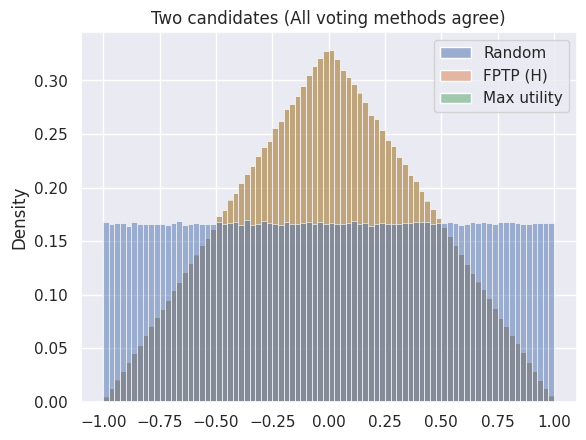

In [164]:
sns.histplot({'Random':all_iss, 'FPTP (H)':pl_h_winner_iss, 'Max utility':max_util},
             binrange=(-1,1), bins=80, stat='density')
plt.title("Two candidates (All voting methods agree)")

ncand=4


Text(0.5, 1.0, 'Four candidates')

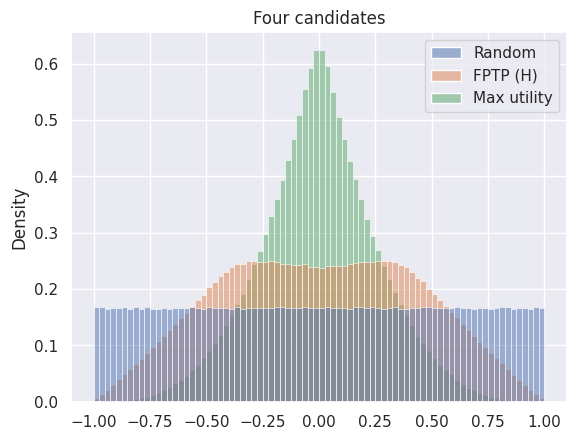

In [166]:
rslt=rslt_4c
iss = rslt.issues[:,:,0]
ncand = len(rslt.issues[0, :, 0])
print(f"{ncand=}")
pl_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.pl_h.winner]
aprv_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.aprv_h.winner]
pl_s_winner_iss = iss[np.arange(len(iss)), rslt.methods.pl_s.winner]
irv_h_winner_iss = iss[np.arange(len(iss)), rslt.methods.IRV_h.winner]
all_iss = iss[np.arange(len(iss)), np.random.randint(0,ncand,len(iss))]
max_util = rslt.issues[:, 0, 0]
sns.histplot({'Random':all_iss, 'FPTP (H)':pl_h_winner_iss, 'Max utility':max_util},
             binrange=(-1,1), bins=80, stat='density')
plt.title("Four candidates")

(-1.0, 1.0)

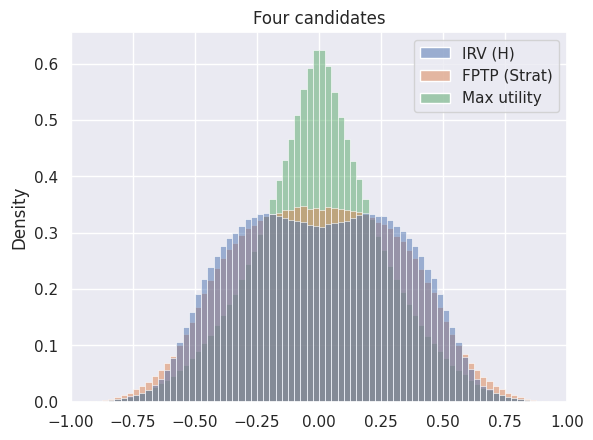

In [169]:
sns.histplot({'IRV (H)':irv_h_winner_iss, 'FPTP (Strat)':pl_s_winner_iss, 'Max utility':max_util},
             binrange=(-1,1), bins=80, stat='density')
plt.title("Four candidates")
plt.xlim([-1,1])

In [29]:
df.foo = [1,2,3]

/tmp/ipykernel_30077/1286104821.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.foo = [1,2,3]


In [ ]:
ak.count_nonzero(rslt_4c.in_smith[np.arange(len(iss)), rslt_4c.methods.aprv_h.winner])

np.int64(7753)

In [15]:
ak.count_nonzero(rslt_4c.num_smith < 3)

np.int64(10000)

In [13]:
ak.count_nonzero(rslt_4c.in_smith[np.arange(len(iss)), rslt_4c.methods["BTR-IRV_h"].winner]) 

np.int64(10000)

In [44]:
rslt_4c.methods.fields

['pl_h',
 'pl_s',
 'IRV_h',
 'aprv_h',
 'aprv_s',
 'star_6_h',
 'star_6_s',
 'BTR-IRV_h',
 'rp_h']

In [12]:
ak.count_nonzero(rslt_4c.in_smith[np.arange(len(iss)), rslt_4c.methods["rp_h"].winner])

np.int64(10000)

In [150]:
def hist_1d_issue(rslt, method, ncand=4, ax=None, nbins=40, title=""):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    iss = rslt.issues[:,:,0]
    winner_iss = iss[np.arange(len(iss)), rslt.methods[method].winner]
    best_iss = rslt.issues[:, 0, 0]
    winner_hist, bin_edges = np.histogram(winner_iss, bins=nbins, range=(-1,1))
    best_hist, _ = np.histogram(best_iss, bins=nbins, range=(-1,1))
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2
    winner_dist_ratio = winner_hist / best_hist
    best_theory = (1. - np.abs(bin_edges))**ncand
    best_theory = np.abs(best_theory[1:] - best_theory[:-1]) / 2 / bin_width
    sns.histplot(winner_iss, binrange=(-1,1), bins=nbins, stat='density', ax=ax)
    ax.plot(bin_centers, best_theory, '.-', c='C1')
    ax.set_xlim([-1, 1])
    ax2 = ax.twinx()
    ax2.semilogy(bin_centers, winner_dist_ratio, '.-')
    ax2.set_ylabel("Ratio elected / best candidate")
    # ax2.set_ylim((0.1, 10.))
    ax.grid(visible=False)
    ax2.grid(which="minor", axis="y")
    ax.set_xlabel("Issue position")
    if title:
        plt.title(title)

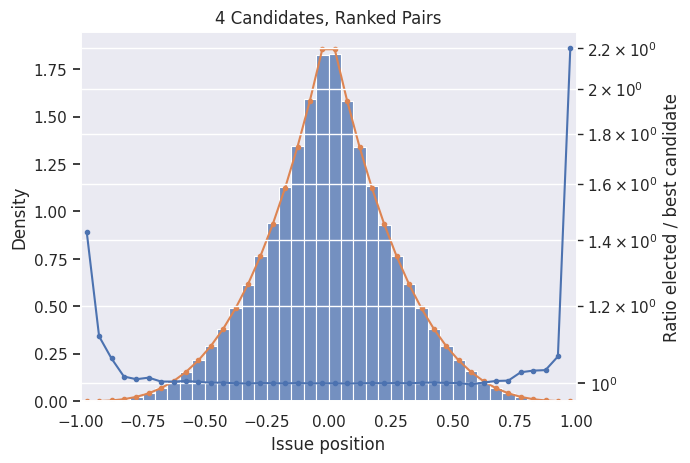

In [170]:
hist_1d_issue(rslt_4c, 'rp_h', nbins=40, title='4 Candidates, Ranked Pairs')

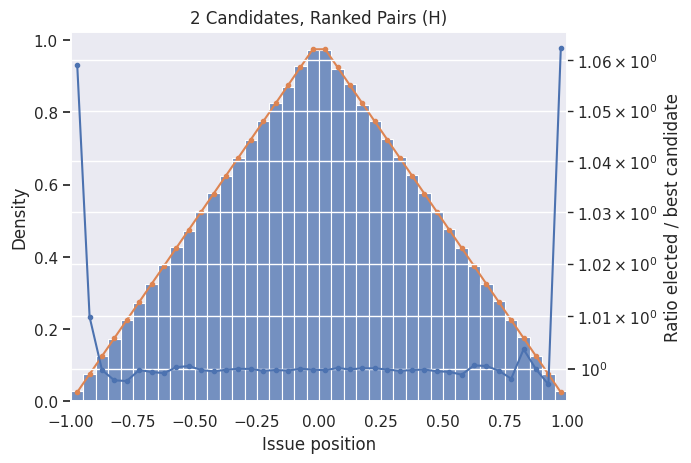

In [151]:
hist_1d_issue(rslt_2c, 'rp_h', ncand=2, nbins=40, title='2 Candidates, Ranked Pairs (H)')

In [153]:
rp_h_2c_misses = rslt_2c[rslt_2c.methods.rp_h.winner != rslt_2c.ideal_cand]
print(f"{len(rp_h_2c_misses)=}")
ak.to_list(rp_h_2c_misses[0])

len(rp_h_2c_misses)=11000


{'ideal_cand': 0,
 'cand_regret': [0.0, 2.0],
 'issues': [[0.9679304477146903], [-0.9393917773774693]],
 'cov_matrix': [[0.32639678404257], [-0.32502573082329217, 0.323819994192864]],
 'num_smith': 1,
 'in_smith': [False, True],
 'methods': {'pl_h': {'winner': 1, 'regret': 2.0},
  'pl_s': {'winner': 1, 'regret': 2.0},
  'IRV_h': {'winner': 1, 'regret': 2.0},
  'aprv_h': {'winner': 1, 'regret': 2.0},
  'aprv_s': {'winner': 1, 'regret': 2.0},
  'star_6_h': {'winner': 1, 'regret': 2.0},
  'star_6_s': {'winner': 1, 'regret': 2.0},
  'BTR-IRV_h': {'winner': 1, 'regret': 2.0},
  'rp_h': {'winner': 1, 'regret': 2.0}}}

In [156]:
ak.to_list(rp_h_2c_misses[3])

{'ideal_cand': 0,
 'cand_regret': [0.0, 2.0],
 'issues': [[0.4388213363855615], [-0.4518552536240268]],
 'cov_matrix': [[0.1720776858602409],
  [-0.10381001893660571, 0.17231256627863786]],
 'num_smith': 1,
 'in_smith': [False, True],
 'methods': {'pl_h': {'winner': 1, 'regret': 2.0},
  'pl_s': {'winner': 1, 'regret': 2.0},
  'IRV_h': {'winner': 1, 'regret': 2.0},
  'aprv_h': {'winner': 1, 'regret': 2.0},
  'aprv_s': {'winner': 1, 'regret': 2.0},
  'star_6_h': {'winner': 1, 'regret': 2.0},
  'star_6_s': {'winner': 1, 'regret': 2.0},
  'BTR-IRV_h': {'winner': 1, 'regret': 2.0},
  'rp_h': {'winner': 1, 'regret': 2.0}}}

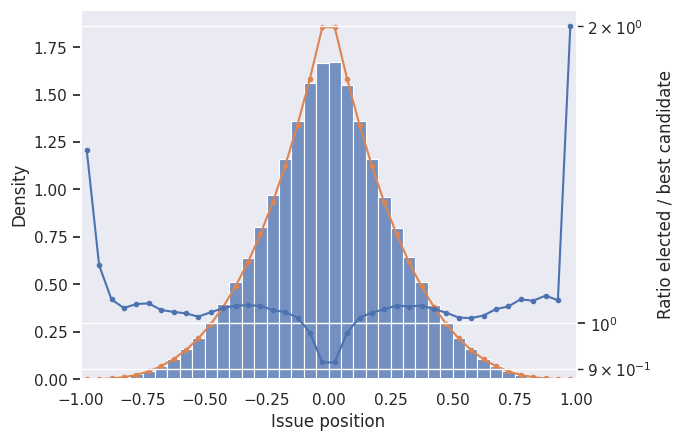

In [158]:
hist_1d_issue(rslt_4c, 'star_6_h')

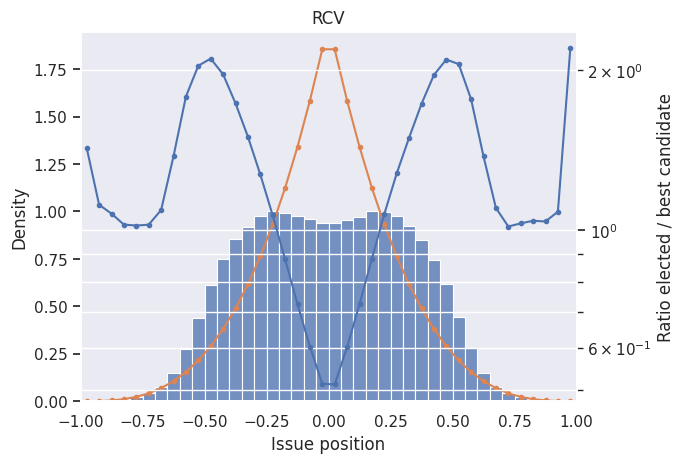

In [172]:
hist_1d_issue(rslt_4c, 'IRV_h', nbins=40, title="RCV")

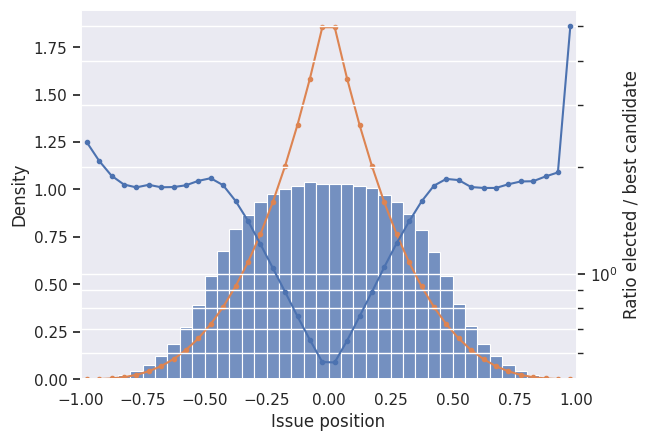

In [160]:
hist_1d_issue(rslt_4c, 'pl_s')

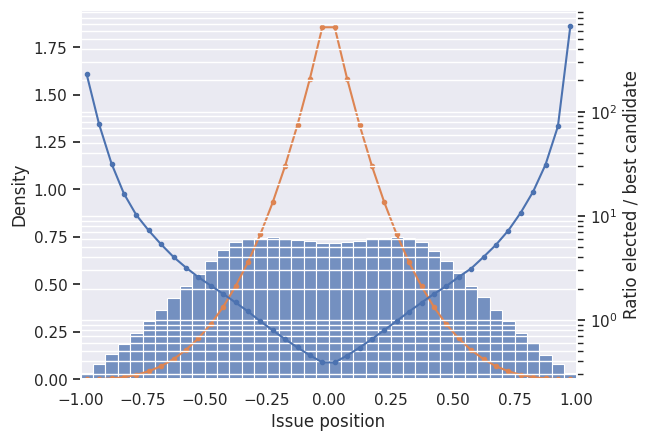

In [161]:
hist_1d_issue(rslt_4c, 'pl_h')

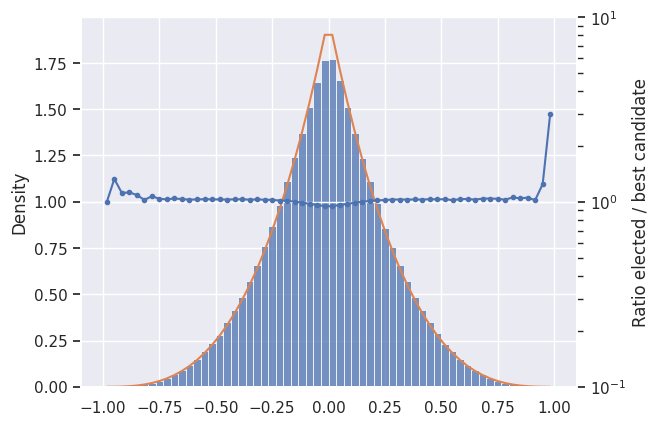

In [18]:
hist_1d_issue(rslt_4c, 'aprv_s')